# Lab 2: Códigos Cíclicos

Alunos: Fernando Zanchitta e Guilherme Kowalczuk

# 1. Simulação

In [51]:
from channel import BSC
from encoder import HammingEncoder, NaiveEncoder, CyclicEncoder
from lab1 import Simulator
from helpers import safe_load

import numpy as np
import random
random.seed(2023)

p = [5e-1, 2e-1, 1e-1, 5e-2, 2e-2, 1e-2, 5e-3, 2e-3, 1e-3, 5e-4, 2e-4, 1e-4, 5e-5, 2e-5, 1e-5]
k = 4
l = 1000000//k

## 1.1. Naive Encoder

In [17]:
naive_encoder = NaiveEncoder()

channels = map(BSC, p)
sim = map(lambda channel: Simulator(naive_encoder, channel, k=k, l=l), channels)
naive_sim = list(map(Simulator.simulate, sim))

print(list(zip(p, naive_sim)))

[(0.5, 0.500831), (0.2, 0.199307), (0.1, 0.100258), (0.05, 0.050281), (0.02, 0.020018), (0.01, 0.009992), (0.005, 0.004897), (0.002, 0.001971), (0.001, 0.001009), (0.0005, 0.000483), (0.0002, 0.000207), (0.0001, 0.000105), (5e-05, 4.1e-05), (2e-05, 2e-05), (1e-05, 1.2e-05)]


## 1.2. Hamming Encoder

In [18]:
hamming_encoder = HammingEncoder()

channels = map(BSC, p)
sim = map(lambda channel: Simulator(hamming_encoder, channel, k=k, l=l), channels)
hamming_sim = list(map(Simulator.simulate, sim))

print(list(zip(p, hamming_sim)))

[(0.5, 0.49955), (0.2, 0.195641), (0.1, 0.067006), (0.05, 0.019427), (0.02, 0.003378), (0.01, 0.000838), (0.005, 0.000191), (0.002, 3.5e-05), (0.001, 9e-06), (0.0005, 3e-06), (0.0002, 0.0), (0.0001, 0.0), (5e-05, 0.0), (2e-05, 0.0), (1e-05, 0.0)]


## 1.2. Cyclic Encoder

In [ ]:
def func(n,k):
    G = np.genfromtxt(f'lab2_values/g{n}_{k}.csv', delimiter=',', dtype=int)
    H = np.genfromtxt(f'lab2_values/h{n}_{k}.csv', delimiter=',', dtype=int)
    mapped_s = np.genfromtxt(f'lab2_values/s{n}_{k}.csv', delimiter=',', dtype=int).tolist()
    k = G.shape[0]
    l = 1000000//k

    cyclic_encoder = CyclicEncoder(G,H,mapped_s)
    channels = map(BSC, p)
    sim = map(lambda channel: Simulator(cyclic_encoder, channel, k=k, l=l), channels)
    cyclic_sim = list(map(Simulator.simulate, sim))
    return cyclic_sim

In [3]:
nk = [(10,6), (12,7), (14,8), (15,9), (16,9), (18,10), (20,11)]
cyc_sim = []

for n,k in nk:
    cyclic_sim = safe_load(f'lab2_values/{n}_{k}.pickle', lambda: func(n,k))
    cyc_sim.append(cyclic_sim)
    print(list(zip(p, cyclic_sim)))

[(0.5, 0.499559998239993), (0.2, 0.30123920495681983), (0.1, 0.15958863835455342), (0.05, 0.08065732262929051), (0.02, 0.032429129716518866), (0.01, 0.016614066456265824), (0.005, 0.008411033644134577), (0.002, 0.0032040128160512643), (0.001, 0.0016980067920271682), (0.0005, 0.000878003512014048), (0.0002, 0.000364001456005824), (0.0001, 0.00015200060800243202), (5e-05, 6.800027200108801e-05), (2e-05, 3.2000128000512e-05), (1e-05, 1.4000056000224001e-05)]
[(0.5, 0.49873349873349876), (0.2, 0.31394431394431394), (0.1, 0.14064714064714065), (0.05, 0.04758804758804759), (0.02, 0.008991008991008992), (0.01, 0.002355002355002355), (0.005, 0.000687000687000687), (0.002, 0.00015000015000015), (0.001, 3.000003000003e-05), (0.0005, 1.2000012000012e-05), (0.0002, 0.0), (0.0001, 5.000005000005e-06), (5e-05, 0.0), (2e-05, 0.0), (1e-05, 0.0)]
[(0.5, 0.499908), (0.2, 0.280667), (0.1, 0.160575), (0.05, 0.087493), (0.02, 0.038276), (0.01, 0.019126), (0.005, 0.009729), (0.002, 0.00399), (0.001, 0.00203

## 2. Comparação

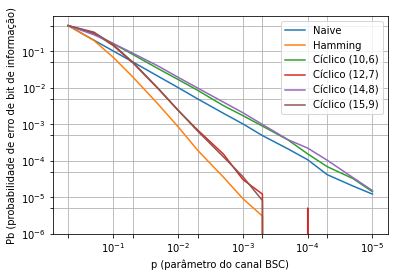

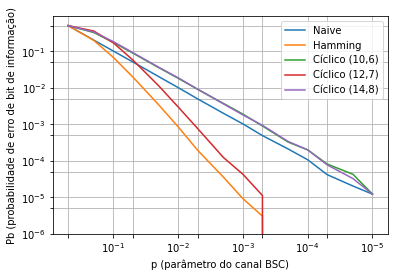

In [60]:
import matplotlib.pyplot as plt

pp = [5e-1, 1e-1, 5e-2,1e-2, 5e-3,1e-3, 5e-4,1e-4, 5e-5, 1e-5, 5e-6,1e-6]

def plot(cyc_sim):
    fig = plt.figure()
    ax = plt.gca()
    plt.plot(p, naive_sim, p, hamming_sim)
    for sim in cyc_sim:
        plt.plot(p, sim)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.invert_xaxis()
    ax.legend(['Naive', 'Hamming'] + [f'Cíclico ({n},{k})' for n,k in nk])
    plt.xlabel('p (parâmetro do canal BSC)')
    plt.ylabel('Pb (probabilidade de erro de bit de informação)')
    plt.xticks(pp[:-2])
    plt.yticks(pp)
    plt.minorticks_off()
    plt.grid(which='both')

plot(cyc_sim[:4])
plot(cyc_sim[4:])


# plt.savefig('grafico.png')
# 10 6 -> 2
# 20 11 -> 2
# 14 8 -> 3
# 16 9 -> 2


# bom
# 18 10 -> 4
# 12 7-> 4
